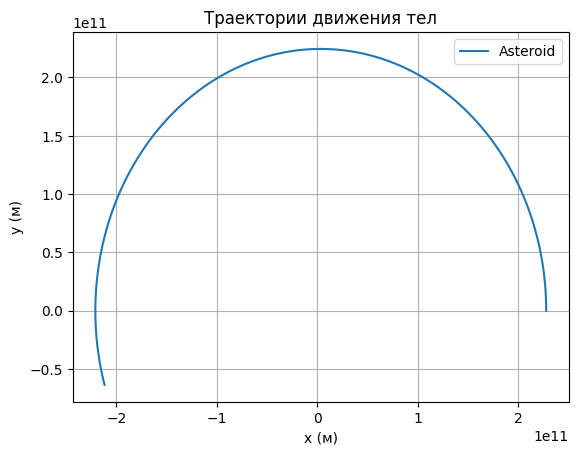

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Гравитационная постоянная
G = 6.67e-11

# Массы тел
M1 = 2.0e30  # масса звезды
M2 = 6.4e23  # масса планеты
M3 = 1.1e16  # масса астероида

# Начальные расстояния
R12 = 228e9  # расстояние между звездой и планетой
R23 = 9.4e6  # расстояние между планетой и астероидом

# Начальные скорости
V2 = 24e3  # скорость планеты
V23 = 2.14e3  # скорость астероида относительно планеты

# Начальные условия
x1_0, y1_0 = 0, 0  # начальные координаты звезды
x2_0, y2_0 = R12, 0  # начальные координаты планеты
x3_0, y3_0 = R12 + R23, 0  # начальные координаты астероида

vx1_0, vy1_0 = 0, 0  # начальные скорости звезды
vx2_0, vy2_0 = 0, V2  # начальные скорости планеты
vx3_0, vy3_0 = 0, V23 + V2  # начальные скорости астероида

# Функция для вычисления производных
def derivatives(t, state):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = state
    
    # Расстояния между телами
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)

    # Ускорения для каждого тела
    ax1 = G * M2 * (x2 - x1) / r12**3 + G * M3 * (x3 - x1) / r13**3
    ay1 = G * M2 * (y2 - y1) / r12**3 + G * M3 * (y3 - y1) / r13**3

    ax2 = G * M1 * (x1 - x2) / r12**3 + G * M3 * (x3 - x2) / r23**3
    ay2 = G * M1 * (y1 - y2) / r12**3 + G * M3 * (y3 - y2) / r23**3

    ax3 = G * M1 * (x1 - x3) / r13**3 + G * M2 * (x2 - x3) / r23**3
    ay3 = G * M1 * (y1 - y3) / r13**3 + G * M2 * (y2 - y3) / r23**3

    return [vx1, vy1, vx2, vy2, vx3, vy3, ax1, ay1, ax2, ay2, ax3, ay3]

# Начальные условия вектором
initial_conditions = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0]

# Время моделирования (например, один год в секундах)
t_span = (0, 3.154e7)
t_eval = np.linspace(0, 3.154e7, 1000)  # промежутки времени для решения

# Решение задачи
sol = solve_ivp(derivatives, t_span, initial_conditions, t_eval=t_eval, rtol=1e-9, atol=1e-9)

# График траекторий тел
# plt.plot(sol.y[0], sol.y[1], label="Star")
# plt.plot(sol.y[2], sol.y[3], label="Planet")
plt.plot(sol.y[4], sol.y[5], label="Asteroid")
plt.legend()
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.title('Траектории движения тел')
plt.grid(True)
plt.show()
